# Using `ml_utils` functions from the `jmspack` package

## Showing the usage of the following `ml_utils` functions

- silence_stdout()
- plot_decision_boundary()
- plot_cv_indices()
- plot_learning_curve()
- dict_of_models
- multi_roc_auc_plot()
- optimize_model()
- plot_confusion_matrix()
- summary_performance_metrics_classification()

In [1]:
import os
tmp = os.getcwd()
os.chdir(tmp.split("jmspack")[0] + "jmspack")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jmspack.ml_utils import (
                              plot_decision_boundary,
                              plot_cv_indices,
                              plot_learning_curve,
                              dict_of_models,
                              multi_roc_auc_plot,
                              optimize_model,
                              plot_confusion_matrix,
                              summary_performance_metrics_classification
                          )

from jmspack.utils import JmsColors
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit
)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
os.chdir(tmp)

In [5]:
if "jms_style_sheet" in plt.style.available:
    _ = plt.style.use("jms_style_sheet")

In [6]:
df = sns.load_dataset("iris")

## plot_decision_boundary

In [7]:
feature_list = df.columns.tolist()[0:2]
target = "species"
X = df[feature_list]
y = df[target]

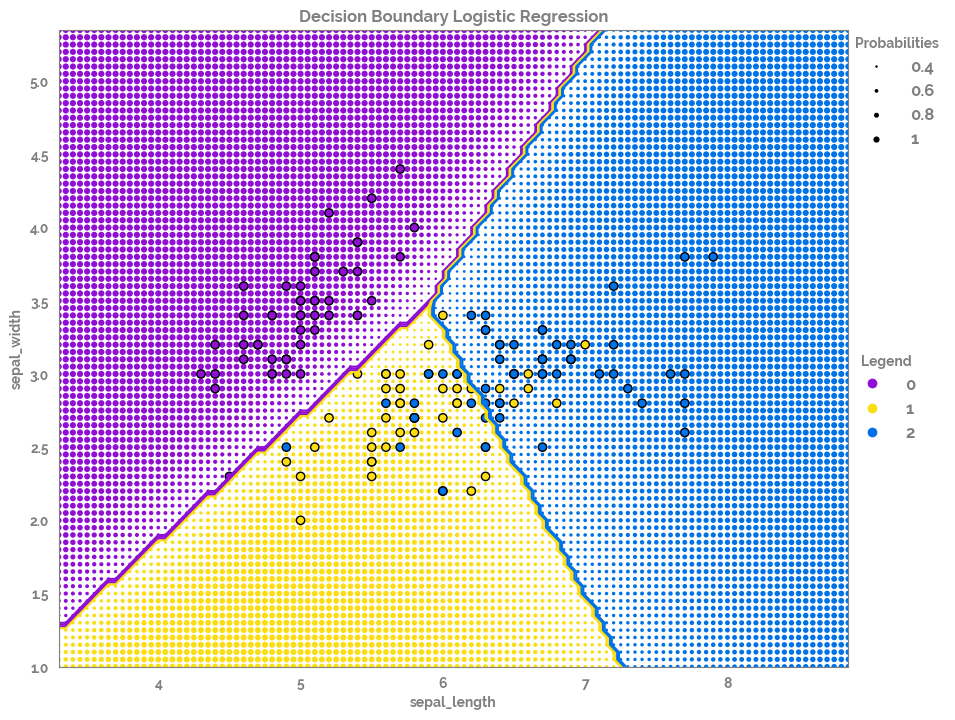

In [8]:
fig, ax = plot_decision_boundary(X=X, y=y)

## plot_cv_indices

In [9]:
n_points = X.shape[0]
n_splits = 5
uneven_groups = np.sort(np.random.randint(0, 10, n_points))

In [10]:
cvs = [TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit]

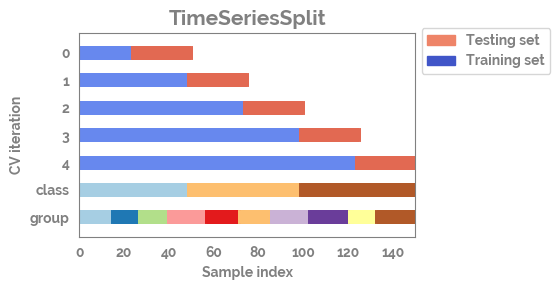

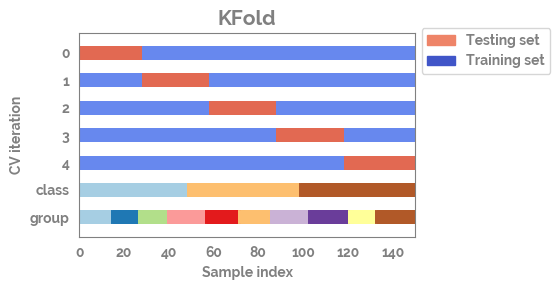

In [11]:
for cv in cvs[0:2]:
    fig, ax = plot_cv_indices(cv(n_splits), X, y.astype("category").cat.codes, uneven_groups, n_splits)

## plot_learning_curve

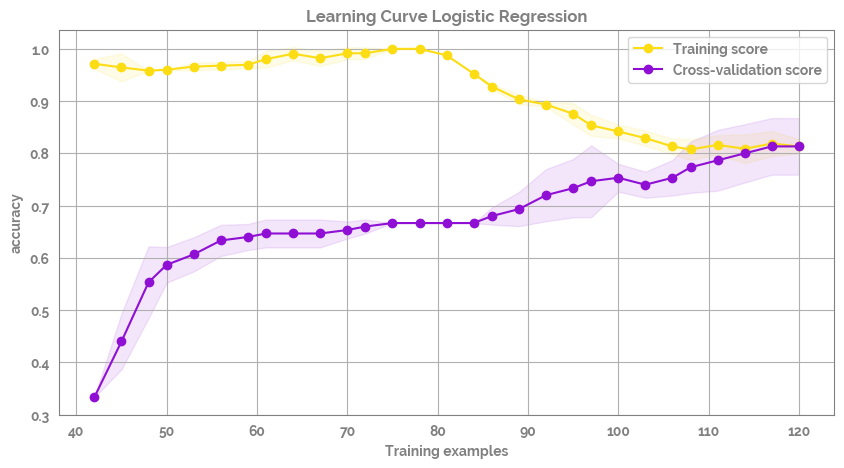

In [12]:
fig, ax = plot_learning_curve(X=X, y=y.astype("category").cat.codes)

## dict_of_models

In [13]:
dict_of_models

[{'label': 'Logistic Regression', 'model': LogisticRegression()},
 {'label': 'Gradient Boosting', 'model': GradientBoostingClassifier()},
 {'label': 'K_Neighbors Classifier',
  'model': KNeighborsClassifier(n_neighbors=3)},
 {'label': 'SVM Classifier (linear)',
  'model': SVC(C=0.025, kernel='linear', probability=True)},
 {'label': 'SVM Classifier (Radial Basis Function; RBF)',
  'model': SVC(C=1, gamma=2, probability=True)},
 {'label': 'Gaussian Process Classifier',
  'model': GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))},
 {'label': 'Decision Tree (depth=5)',
  'model': DecisionTreeClassifier(max_depth=5)},
 {'label': 'Random Forest Classifier(depth=5)',
  'model': RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)},
 {'label': 'Multilayer Perceptron (MLP) Classifier',
  'model': MLPClassifier(alpha=1, max_iter=1000)},
 {'label': 'AdaBoost Classifier', 'model': AdaBoostClassifier()},
 {'label': 'Naive Bayes (Gaussian) Classifier', 'model': GaussianNB

## multi_roc_auc_plot

In [14]:
X = df.loc[df[target].isin(df[target].unique().tolist()[1:3]), feature_list]
y = df.loc[df[target].isin(df[target].unique().tolist()[1:3]), target]

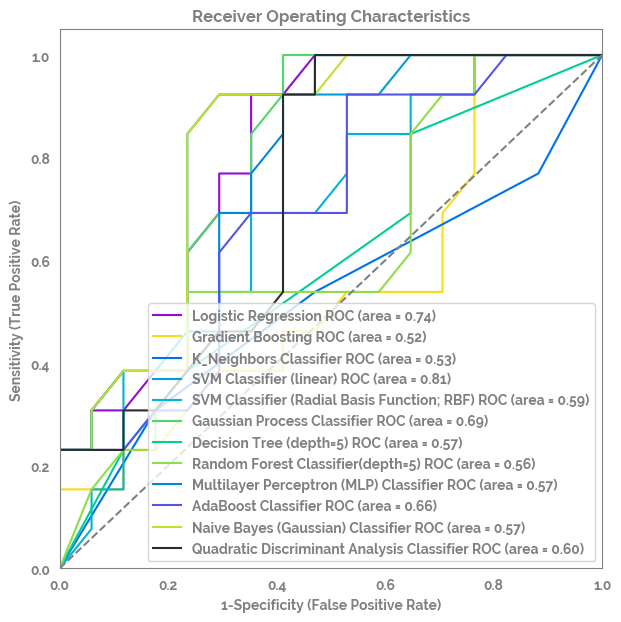

In [15]:
fig, ax = multi_roc_auc_plot(X=X, y=y.astype("category").cat.codes)

## optimize_model

In [16]:
feature_list = df.columns.tolist()[0:4]
X = df.loc[df[target].isin(df[target].unique().tolist()[1:3]), feature_list]
y = df.loc[df[target].isin(df[target].unique().tolist()[1:3]), target].astype("category").cat.codes

In [17]:
(optimized_estimator,
 feature_ranking,
feature_selected,
feature_importance,
 optimal_params
) = optimize_model(X=X, y=y)

Fitting estimator with 4 features.
Fitting estimator with 3 features.

- Sizes :
- X shape = (100, 4)
- y shape = (100,)
- X_train shape = (70, 4)
- X_test shape = (30, 4)
- y_train shape = (70,)
- y_test shape = (30,)

- Model info :
- Optimal Parameters = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
- Selected feature list = ['sepal_length', 'petal_length']
- Accuracy score on test set = 86.7%


In [18]:
optimal_params

,bootstrap,ccp_alpha,class_weight,criterion,max_depth,max_features,max_leaf_nodes,max_samples,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_jobs,oob_score,random_state,verbose,warm_start
optimal_parameters,True,0.0,None,gini,1,log2,None,None,0.0,1,2,0.0,40,None,False,None,0,False


## plot_confusion_matrix

In [19]:
clf = LogisticRegression()
X = df.loc[df[target].isin(df[target].unique().tolist()[1:3]), feature_list]
y = df.loc[df[target].isin(df[target].unique().tolist()[1:3]), target].astype("category").cat.codes

train_set_percentage = 0.6
train_X = X.sample(frac=train_set_percentage, random_state=69420)
train_y = y.loc[train_X.index]
test_X = X.drop(train_X.index, axis=0)
test_y = y.drop(train_X.index, axis=0)

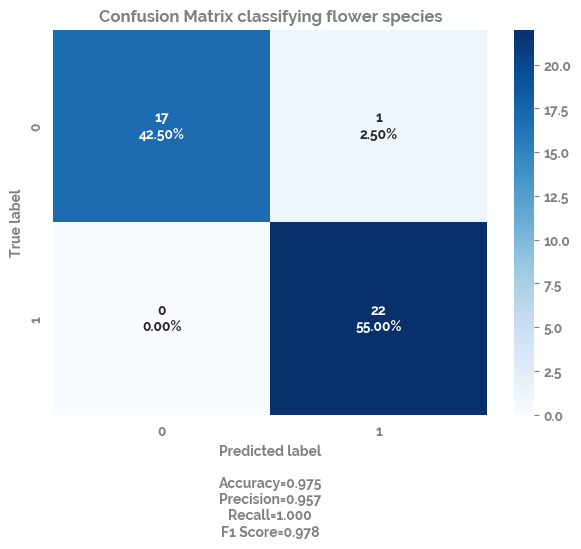

In [20]:
_ = clf.fit(X = train_X, 
            y = train_y)
    
pred_y = clf.predict(test_X)
cf_matrix = confusion_matrix(test_y, pred_y)

fig, ax = plot_confusion_matrix(cf=cf_matrix, title="Confusion Matrix classifying flower species")

## summary_performance_metrics_classification

In [21]:
metrics_df = summary_performance_metrics_classification(model=clf, X_test=test_X, y_true=test_y)
metrics_df

,TN,FP,FN,TP,Accuracy,Balanced Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,auc,Mean AUC (CI 5%-95%),F1
scores,17,1,0,22,0.975,0.972,0.55,1.0,0.944,0.957,1.0,0.995,0.995 (95% CI 0.995-0.995),0.978
